<a href="https://colab.research.google.com/github/muhiqbalalamin/DeepLearning-UAS/blob/main/Chapter_6_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Persiapan

In [1]:
# Cek versi Python dan Scikit-Learn
import sys, sklearn
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

# Import dasar
import numpy as np
import matplotlib.pyplot as plt
import os

# Stabilkan hasil dan pengaturan plot
np.random.seed(42)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Fungsi menyimpan gambar
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("images/decision_trees", fig_id + "." + fig_extension)
    os.makedirs(os.path.dirname(path), exist_ok=True)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Training dan Visualisasi Decision Tree

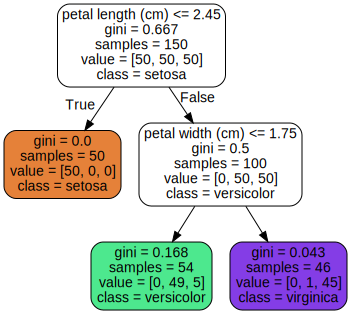

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
import os

# Load dan pilih fitur petal
iris = load_iris()
X = iris.data[:, 2:]  # hanya petal length & width
y = iris.target

# Buat dan latih model Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# Buat path untuk menyimpan file DOT
dot_path = "iris_tree.dot"
export_graphviz(
    tree_clf,
    out_file=dot_path,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

# Tampilkan hasil visualisasi di notebook
Source.from_file(dot_path)

## Membuat Prediksi

Saving figure decision_tree_boundary_plot


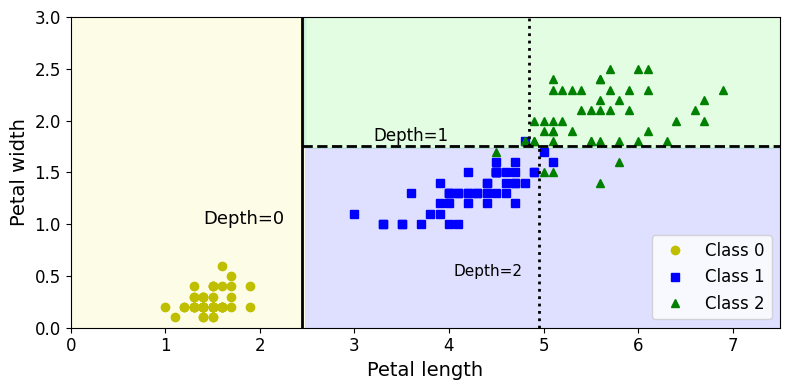

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3]):
    x1s, x2s = np.linspace(axes[0], axes[1], 100), np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)

    markers = ['yo', 'bs', 'g^']
    for i, marker in enumerate(markers):
        plt.plot(X[:, 0][y == i], X[:, 1][y == i], marker, label=f"Class {i}")

    plt.axis(axes)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="lower right", fontsize=12)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

# Tambahan garis dan teks untuk ilustrasi kedalaman
plt.plot([2.45, 2.45], [0, 3], "k-", lw=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", lw=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", lw=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", lw=2)
plt.text(1.4, 1.0, "Depth=0", fontsize=13)
plt.text(3.2, 1.8, "Depth=1", fontsize=12)
plt.text(4.05, 0.5, "Depth=2", fontsize=11)

save_fig("decision_tree_boundary_plot")
plt.show()

## Estimasi Kelas Probabilitas

[[0.         0.90740741 0.09259259]]
[1]


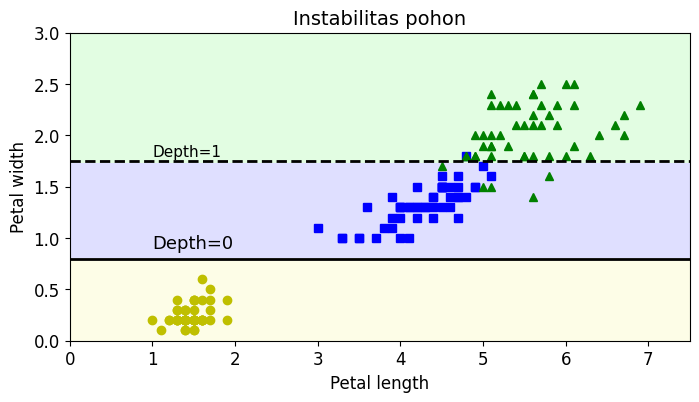

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, make_moons
import numpy as np
import matplotlib.pyplot as plt
import os

# Fungsi bantu visualisasi
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes, iris=True, legend=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=0.3)
    for i, color in zip(np.unique(y), ['yo', 'bs', 'g^'] if iris else ['bo', 'rs']):
        plt.plot(X[:, 0][y == i], X[:, 1][y == i], color, label=f"Class {i}")
    plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=12)
        plt.ylabel("Petal width", fontsize=12)
    if legend:
        plt.legend(loc="lower right", fontsize=10)

# --- 1. Prediksi probabilitas dan kelas
iris = load_iris()
X, y = iris.data[:, 2:], iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42).fit(X, y)
print(tree_clf.predict_proba([[5, 1.5]]))  # Probabilitas
print(tree_clf.predict([[5, 1.5]]))        # Kelas prediksi

# --- 2. Instabilitas pada batas keputusan
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40).fit(X, y)
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, [0, 7.5, 0, 3], legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", lw=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", lw=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=13)
plt.text(1.0, 1.80, "Depth=1", fontsize=11)
plt.title("Instabilitas pohon", fontsize=14)
plt.show()

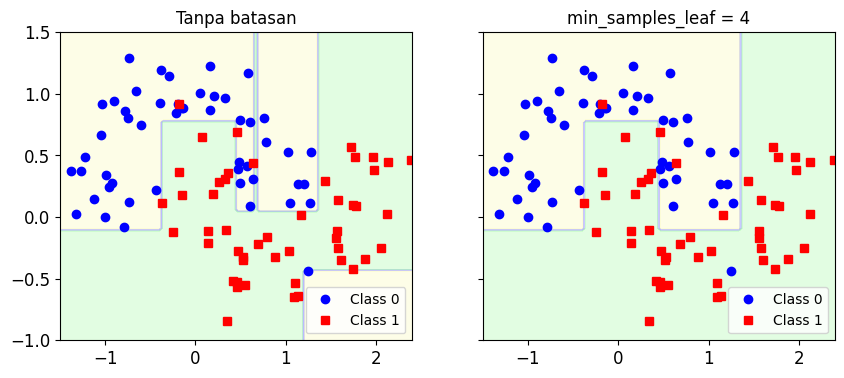

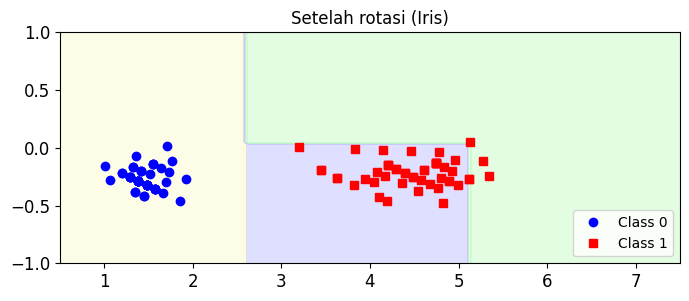

In [5]:
# --- 3. Pengaruh min_samples_leaf
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)
deep_tree1 = DecisionTreeClassifier(random_state=42).fit(Xm, ym)
deep_tree2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42).fit(Xm, ym)

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree1, Xm, ym, [-1.5, 2.4, -1, 1.5], iris=False)
plt.title("Tanpa batasan", fontsize=12)
plt.sca(axes[1])
plot_decision_boundary(deep_tree2, Xm, ym, [-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = 4", fontsize=12)
plt.show()

# --- 4. Sensitivitas terhadap rotasi
angle = np.pi / 180 * 20
rot_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X @ rot_matrix
tree_clf_r = DecisionTreeClassifier(random_state=42).fit(Xr, y)
plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, [0.5, 7.5, -1.0, 1], iris=False)
plt.title("Setelah rotasi (Iris)", fontsize=12)
plt.show()

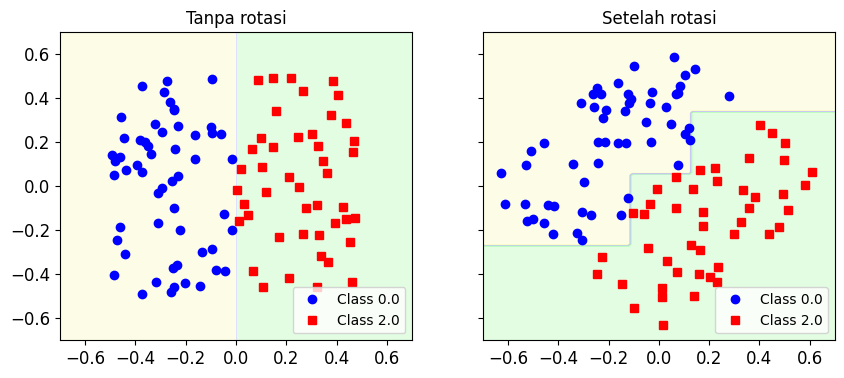

In [6]:
# --- 5. Sensitivitas rotasi (sintetik)
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2
angle = np.pi / 4
Xsr = Xs @ np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
tree_s = DecisionTreeClassifier(random_state=42).fit(Xs, ys)
tree_sr = DecisionTreeClassifier(random_state=42).fit(Xsr, ys)

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_s, Xs, ys, [-0.7, 0.7, -0.7, 0.7], iris=False)
plt.title("Tanpa rotasi", fontsize=12)
plt.sca(axes[1])
plot_decision_boundary(tree_sr, Xsr, ys, [-0.7, 0.7, -0.7, 0.7], iris=False)
plt.title("Setelah rotasi", fontsize=12)
plt.show()

## Regresi

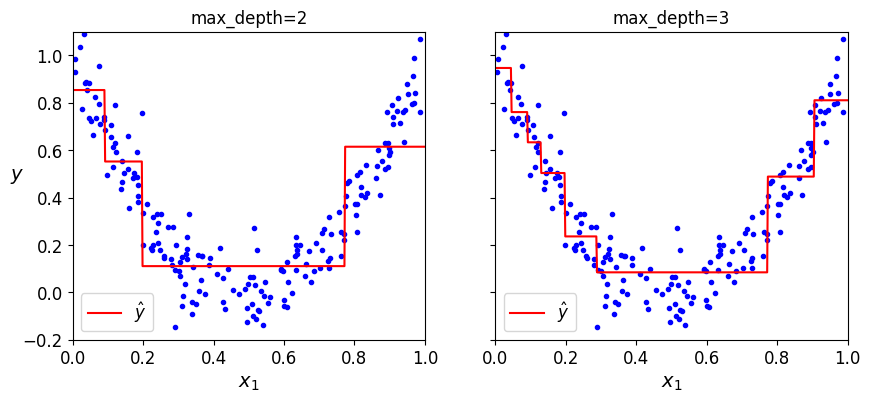

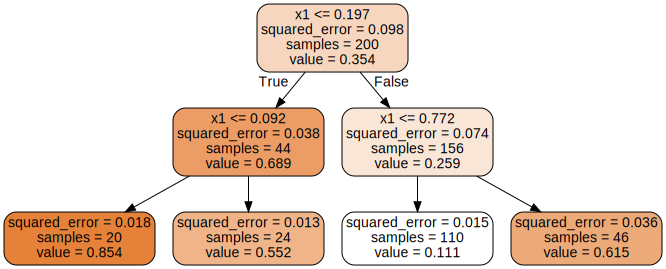

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from graphviz import Source
import os

# Dataset kuadratik dengan noise
np.random.seed(42)
X = np.random.rand(200, 1)
y = 4 * (X - 0.5) ** 2 + np.random.randn(200, 1) / 10

# Fungsi plot prediksi regresi
def plot_predictions(model, X, y, axes=[0, 1, -0.2, 1.1], ylabel="$y$"):
    x_test = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = model.predict(x_test)
    plt.axis(axes)
    plt.plot(X, y, "b.")
    plt.plot(x_test, y_pred, "r-", label=r"$\hat{y}$")
    plt.xlabel("$x_1$", fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, fontsize=14, rotation=0)
    plt.legend(fontsize=12)

# Model depth=2 dan depth=3
reg1 = DecisionTreeRegressor(max_depth=2, random_state=42).fit(X, y)
reg2 = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X, y)

# Visualisasi model depth berbeda
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_predictions(reg1, X, y)
plt.title("max_depth=2", fontsize=12)

plt.sca(axes[1])
plot_predictions(reg2, X, y, ylabel=None)
plt.title("max_depth=3", fontsize=12)
plt.show()

# Visualisasi pohon untuk depth=2
dot_path = "regression_tree.dot"
export_graphviz(reg1, out_file=dot_path, feature_names=["x1"], filled=True, rounded=True)
Source.from_file(dot_path)

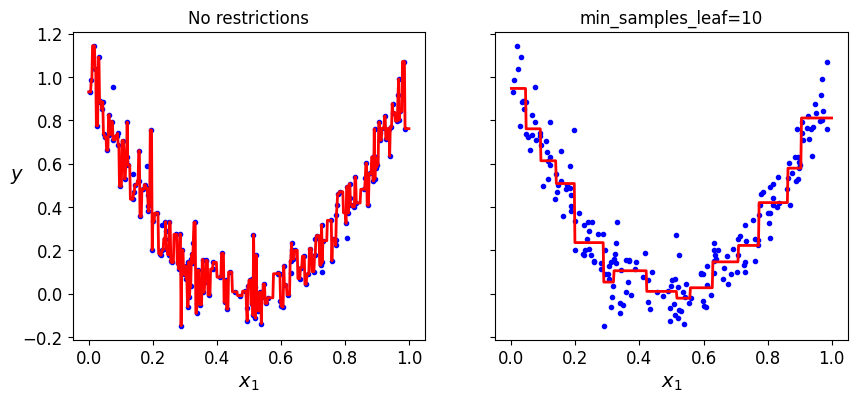

In [8]:
# Model tanpa batasan vs min_samples_leaf
reg3 = DecisionTreeRegressor(random_state=42).fit(X, y)
reg4 = DecisionTreeRegressor(min_samples_leaf=10, random_state=42).fit(X, y)

x_test = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred3 = reg3.predict(x_test)
y_pred4 = reg4.predict(x_test)

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x_test, y_pred3, "r-", linewidth=2)
plt.title("No restrictions", fontsize=12)
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x_test, y_pred4, "r-", linewidth=2)
plt.title("min_samples_leaf=10", fontsize=12)
plt.xlabel("$x_1$")
plt.show()

# **Ringkasan & Analisis Decision Tree Regression**

## 1. Pembuatan Dataset
Dataset terdiri dari 200 sampel acak dengan fitur X bernilai antara 0 hingga 1.
Target y dibentuk berdasarkan fungsi kuadratik, kemudian ditambahkan noise acak agar lebih menyerupai data dunia nyata.

## 2. Pelatihan Model
Dua model DecisionTreeRegressor dilatih dengan parameter berbeda:

* Model 1: max_depth=2

* Model 2: max_depth=3

Tujuannya adalah untuk membandingkan kemampuan model dalam menangkap pola non-linear.

## 3. Visualisasi Kurva Prediksi
Prediksi model divisualisasikan dalam bentuk kurva ŷ.
Model dengan max_depth=3 menghasilkan kurva yang lebih mendekati bentuk fungsi asli dibandingkan model dengan max_depth=2, menunjukkan kemampuan representasi yang lebih baik terhadap kompleksitas data.

## 4. Visualisasi Struktur Pohon
Struktur model dengan max_depth=2 divisualisasikan menggunakan export_graphviz dan graphviz.Source.
Visualisasi ini menunjukkan bagaimana fitur x₁ dibagi berdasarkan nilai ambang (threshold), serta bagaimana nilai rata-rata y ditetapkan pada setiap daun pohon.

## 5. Eksperimen Regularisasi dengan min_samples_leaf
Dilakukan perbandingan antara dua model:

* Tanpa batasan jumlah sampel minimum pada daun.

* Dengan min_samples_leaf=10.

Model dengan regularisasi (min_samples_leaf=10) menghasilkan kurva prediksi yang lebih halus dan stabil.
Regularisasi ini membantu mencegah overfitting terhadap noise pada data.

# Kesimpulan
DecisionTreeRegressor merupakan model yang efektif untuk mempelajari pola non-linear, seperti pada fungsi kuadratik.
Namun, pemilihan parameter sangat berpengaruh terhadap performa model:

* max_depth terlalu kecil → menyebabkan underfitting.

* max_depth terlalu besar → berisiko overfitting, terutama jika data mengandung noise.

Parameter min_samples_leaf berperan penting sebagai teknik regularisasi untuk menghasilkan model yang lebih general dan tidak terlalu kompleks.
Selain itu, visualisasi struktur pohon dan kurva prediksi sangat membantu dalam memahami cara kerja Decision Tree dan dampak dari setiap parameter terhadap hasil akhir.